# Demo - Construyendo Detector de Personas con YOLOv2

En este notebook seguimos el tutorial de https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q "The AI Guy" para elaborar un pipeline para implementar YOLOv2. La arquitectura se modificó para que se ajuste a los requerimientos de nuestro detector, la cantidad de clases y el tamaño de data que tenemos. Como resultado final logramos obtener un demo de un detector personalizado YOLOv2.



## 1.Hay que asegurarse que el GPU está activado antes de iniciar la ejecución.




## 2.Clonar y construir Darknet
#### Clonar el repositorio de Github de la versión de AlexeyAB.

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 13862 (delta 44), reused 54 (delta 37), pack-reused 13784
Receiving objects: 100% (13862/13862), 12.52 MiB | 21.87 MiB/s, done.
Resolving deltas: 100% (9451/9451), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:921:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1122:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## 3.Descargar los pesos pre-entrenados de YOLOv2.


In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov2.weights

--2020-07-07 00:55:38--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M   847KB/s    in 3m 27s  

2020-07-07 00:59:06 (962 KB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:

# This stops 'Run all' at this cell by causing an error
assert False

## 4.Vincular Drive con Colab

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'01.- TUTORIAL para el alumno para registrar al ZOOM su cuenta de correo con dominio @ue.edu.pe.mp4'
 1745.gslides
'1. Zannie.mp4'
'2. Sofía.mp4'
'3. Rodrigo C.mp4'
 Abstract-Squares-PowerPoint-Templates.gslides
'AF IE III 3 WRITING 3 GUIDED PRACTICE (2).docx'
 Alumnos.rar
 Analisis_de_Correspondencias.gdoc
'Análisis Multivariado Apuntes'
 AnalisisOferta_Demanda.xlsx
'Anexo 6 - Informe Final (1).gdoc'
'Anexo 6 - Informe Final.gdoc'
'Apuntes DEP'
 ARBattleCry
'Árboles de Clasificación - Gráfico circular 1.gsheet'
'Árboles de Decisión- Grupo 01.gslides'
 ARDURASPI.ino
'Backorder SCM.xlsx'
'Balanced Snacking.gdoc'
'Barnes & Noble Case Study.gslides'
'Base de datos del Laboratorio Dirigido 2.xlsx'
 BD
'BD - Apache Hive.gslides'
'Beneficios y amenazas del Dark Net (1).pptx.gslides'
'Beneficios y amenazas del Dark Net.pptx'
'Beneficios y amenazas del Dark Net.pptx.gslides'
 blind_smarty.ino
'Borrador - Grupo Pomodoro.pdf'
'BPMN AGN'
 Break-Even.xlsx
'Business Case IT-Led Business Tran

In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov2.cfg yolov2.weights /mydrive/IAAYolo/images/distancia.jpg
imShow('predictions.jpg')

[Errno 2] No such file or directory: 'darknet'
/
/bin/bash: ./darknet: No such file or directory


AttributeError: ignored

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/IAAYolo/images/detection1.jpg

## 5.Preparando el ambiente para el Detector YOLOv2 Personalizado  

Para esto necesitariamos lo siguiente:
*   Anotaciones del Dataset
*   Archivo  custom .cfg, YOLOv2 editado para los requerimientos del caso. 
*   Archivos obj.data & obj.names 
*   Archivos train.txt y test.txt


In [ ]:
#%cd ..
#!ls
%cd content

/content


In [ ]:
!ls

darknet  gdrive  sample_data


In [ ]:
%cd darknet

/content/darknet


In [ ]:
# En esta carpeta estará la data que necesitaremos
!ls /mydrive/IAAYolo/yolov2ppl

backup		gamarrav2.avi  out2.avi		  test.txt
chart.png	obj.data       out3.avi		  train.txt
gamarra25.avi	obj.names      out.avi		  video01.mp4
gamarra608.avi	obj.zip        pedestrians.mp4	  yolov2_custom_1.cfg
gamarra.mp4	out25.avi      pedestriansv2.avi  yolov2_custom.cfg


In [ ]:
# Copiamos el zip obj al directorio raíz donde está la carpeta Darknet donde se encuentran nuestras anotacionaes en formato yolo e imagenes.
!cp /mydrive/IAAYolo/yolov2ppl/obj.zip ../

In [ ]:
# Descomprimimos el archivo obj en la carpeta data dentro de Darknet, en /darknet/data/obj
!unzip ../obj.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/obj/COCO_val2014_000000513507.txt  
  inflating: data/obj/COCO_val2014_000000513524.jpg  
  inflating: data/obj/COCO_val2014_000000513524.txt  
  inflating: data/obj/COCO_val2014_000000513555.jpg  
  inflating: data/obj/COCO_val2014_000000513555.txt  
  inflating: data/obj/COCO_val2014_000000513567.jpg  
  inflating: data/obj/COCO_val2014_000000513567.txt  
  inflating: data/obj/COCO_val2014_000000513574.jpg  
  inflating: data/obj/COCO_val2014_000000513574.txt  
  inflating: data/obj/COCO_val2014_000000513580.jpg  
  inflating: data/obj/COCO_val2014_000000513580.txt  
  inflating: data/obj/COCO_val2014_000000513600.jpg  
  inflating: data/obj/COCO_val2014_000000513600.txt  
  inflating: data/obj/COCO_val2014_000000513604.jpg  
  inflating: data/obj/COCO_val2014_000000513604.txt  
  inflating: data/obj/COCO_val2014_000000513615.jpg  
  inflating: data/obj/COCO_val2014_000000513615.txt  
  inflating: data/obj/COCO_val2

### 5.1.-Configurando los Archivos del punto 5

Acá vamos a configurar el archivo personalizado .cfg, que contiene la configuración de la arquitectura del modelo que vamos a usar, el obj.datam obj.names y los archivos de train.txt y test.txt.
This step involves properly configuring your custom .cfg file, obj.data, obj.names and train.txt file.


In [ ]:
# Esto se realiza una sola vez, después ya tendremos el modelo para configurar en nuestro drive
#download cfg to google drive and change its name
#!cp cfg/yolov3.cfg /mydrive/yolov3ppl/yolov3_custom2.cfg

In [ ]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
#download('cfg/yolov3.cfg')

Dentro del .cfg se cambió el batch = 64, las subdivisiones a 16 para mejores resultados. Asimismo, como se describe en el paper de Yolo max_batches es igual a 2000 * num_clases, en nuestro caso son 5 así que será 10000, con steps=8000,9000, cambiamos el número de clases a 5 en las tres capas YOLO y se ajustó el valor de los filtros de las 3 capas anteriores a las capas YOLO con la fórmula: Filtros = (C+5)*3 = 30.

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/IAAYolo/yolov2ppl/yolov2_custom.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

### 5.2.-Cargamos los archivos obj.names y obj.data

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/IAAYolo/yolov2ppl/obj.names ./data
!cp /mydrive/IAAYolo/yolov2ppl/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

## 5.3.- Generamos los grupos de Train y Test

Para esto se generaran los archivos train.txt y test.txt que contienen las rutas de las imágenes, para esta división utilizamos la regla de Pareto de 80/20.

In [ ]:
# Copiamos las muestras de train y test dentro de la VM en la nube: yolov3ppl
!cp /mydrive/IAAYolo/yolov2ppl/test.txt ./data
!cp /mydrive/IAAYolo/yolov2ppl/train.txt  ./data

In [ ]:
# Cargamos el archivo para generar el test y train desde el drive
#!cp /mydrive/yolov3ppl/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


In [ ]:
#!cp /mydrive/yolov3ppl/train_test.py ./

Now we simply run the python script to do all the work for us.

In [ ]:
# Generamos Train y Test, si no se tienen las muestras en el Drive
#!python generate_train.py

In [ ]:
!ls

3rdparty   CMakeLists.txt	   include		  results
backup	   darknet		   json_mjpeg_streams.sh  scripts
bad.list   DarknetConfig.cmake.in  LICENSE		  src
build	   darknet.py		   Makefile		  video_v2.sh
build.ps1  darknet_video.py	   net_cam_v3.sh	  video_yolov3.sh
build.sh   data			   obj			  yolov2.weights
cfg	   image_yolov2.sh	   predictions.jpg
cmake	   image_yolov3.sh	   README.md


In [ ]:
# Verificamos que train.txt y test.txt estén en darknet/data
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     test.txt
coco.names  goal.txt	 labels			   openimages.names  train.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


## 6.Descargamos los pesos pre-entrenados de las capas convolucionales, como estamos usando YOLOv2, se usará Darknet-19: Download pre-trained weights for the convolutional layers.

Se utilizan estos pesos porque ayudan al modelo a entrenar y covnerger más rápido, además de conseguir un mejor accuracy. 

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet19_448.conv.23

URL transformed to HTTPS due to an HSTS policy
--2020-07-07 01:04:08--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M   910KB/s    in 77s     

2020-07-07 01:05:25 (1010 KB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



## 7.Entrenar el modelo Detector de objetos personalizado - YOLOv2

Un tip que se extrajo del tutorial de "The IA guy" es utilizar el siguiente código para evitar que Google Colab te kickee por estar afk cierto tiempo.



Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Este código hará click en la pantalla cada 10 minutos para que Colab no te expulse por estar inactivo. 



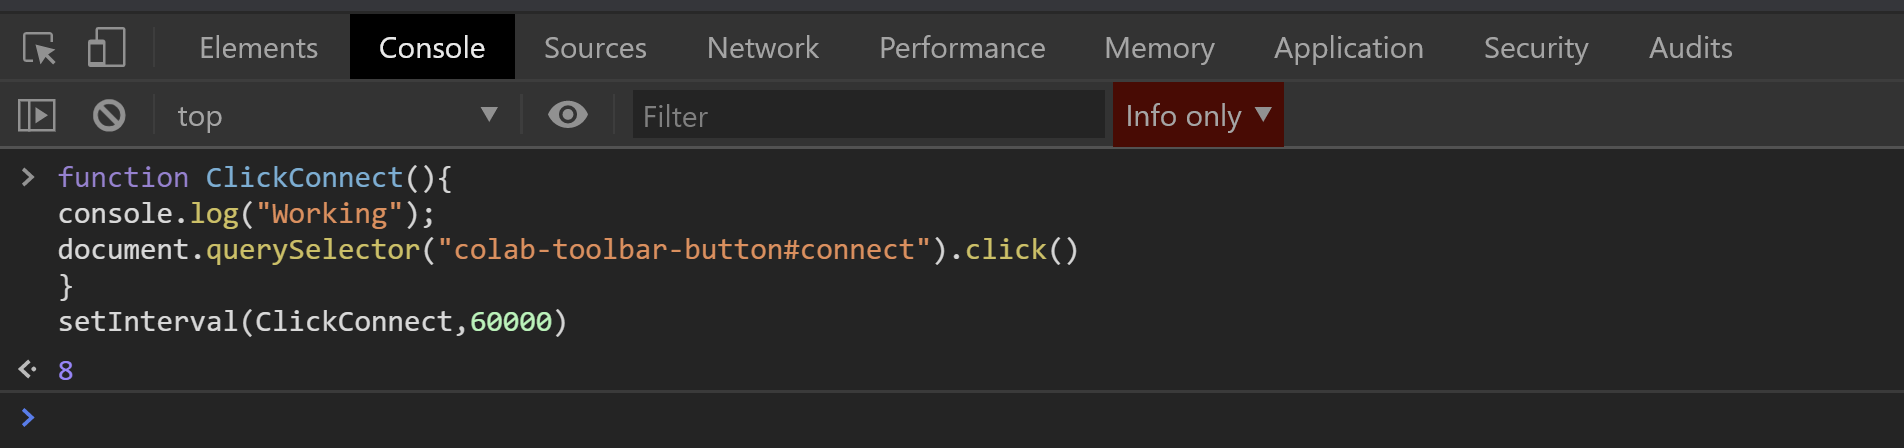

In [ ]:
# train your custom detector
# !./darknet detector train data/obj.data cfg/yolov2_custom.cfg darknet19_448.conv.23 -dont_show
!./darknet detector train data/obj.data cfg/yolov2_custom_1.cfg darknet19_448.conv.23 -dont_show #Entrenando con dimensiones cambiadas

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov2_custom_1
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 8, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 640 x   3 ->  640 x 640 x  32 0.708 BF
   1 max                2x 2/ 2    640 x 640 x  32 ->  320 x 320 x  32 0.013 BF
   2 conv     64       3 x 3/ 1    320 x 320 x  32 ->  320 x 320 x  64 3.775 BF
   3 max                2x 2/ 2    320 x 320 x  64 ->  160 x 160 x  64 0.007 BF
   4 conv    128       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x 128 3.775 BF
   5 conv     64       1 x 1/ 1    160 x 160 x 128 ->  160 x 160 x  64 0.419 BF
   6 conv    128       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x 128 3.775 BF
   7 max                2x 2/ 2    160 x 160 x 128 ->   80 x  80 x 128 0.003 BF
   8 conv    256       3 x 3/ 1     80 

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

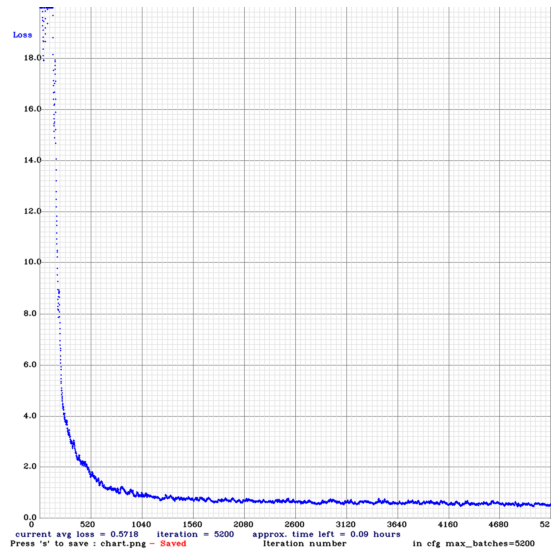

In [ ]:
imShow('chart.png')

In [ ]:
# Guardamos el Gráfico en el Drive
!cp ./chart.png /mydrive/IAAYolo/yolov2ppl/

Otro truco que se extrajo fue que si por alguna razón Colab falla, no se pierden los pesos que se han entrenado ya que cada 100 iteraciones un archivo de los pesos llamado yolov3_custom_last.weights es guardado en la carpeta que especificamos en el drive: mydrive/yolov3/backup/. De esta manera, si Colab crashea o sucede otro fallo se tiene un avance almacenado. 

Para continuar con el entrenamiento desde el último peso guardado se puede usar el siguiente código y de esa manera no se tendrá que reiniciar el entrenamiento.

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom-c1.cfg /mydrive/yolov3ppl/backup/yolov3_custom-c1_last.weights #-dont_show

In [ ]:
imShow('chart.png')

## 8.Test: Ejecutamos pruebas en el Detector

Vamos a probar con unos predicts y por último calcularemos el mAP.


In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov2_custom.cfg
!sed -i 's/subdivisions=8/subdivisions=1/' yolov2_custom.cfg
%cd ..


[Errno 2] No such file or directory: 'cfg'
/content
sed: can't read yolov2_custom.cfg: No such file or directory
sed: can't read yolov2_custom.cfg: No such file or directory
/


### 8.1.-Pruebas con Imágenes independientes:

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 640 x   3 ->  640 x 640 x  32 0.708 BF
   1 max                2x 2/ 2    640 x 640 x  32 ->  320 x 320 x  32 0.013 BF
   2 conv     64       3 x 3/ 1    320 x 320 x  32 ->  320 x 320 x  64 3.775 BF
   3 max                2x 2/ 2    320 x 320 x  64 ->  160 x 160 x  64 0.007 BF
   4 conv    128       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x 128 3.775 BF
   5 conv     64       1 x 1/ 1    160 x 160 x 128 ->  160 x 160 x  64 0.419 BF
   6 conv    128       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x 128 3.775 BF
   7 max                2x 2/ 2    160 x 160 x 128 ->   80 x  80 x 128 0.003 BF
   8 conv    256       3 x 3/ 1     80 x  80 x 128 ->   

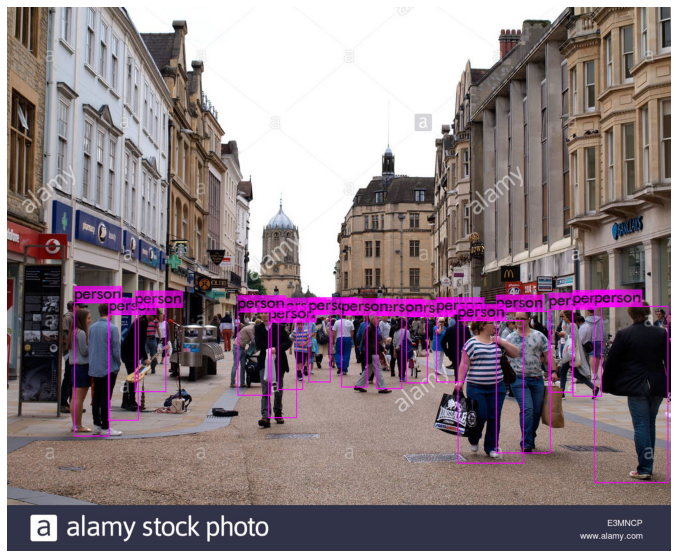

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
# !./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights /mydrive/IAAYolo/images/people.jpg -thresh 0.3
!./darknet detector test data/obj.data cfg/yolov2_custom_1.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights /mydrive/IAAYolo/images/people.jpg -thresh 0.3
imShow('predictions.jpg')
download('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 2

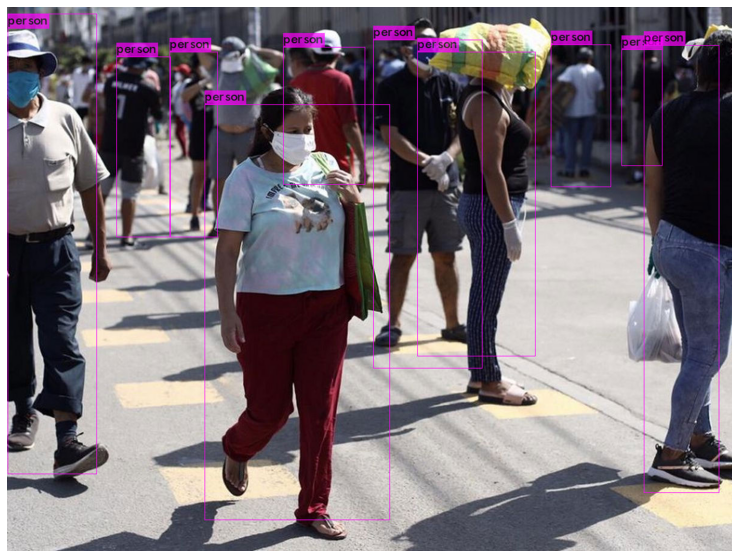

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !./darknet detector test data/obj.data cfg/yolov3_custom-c1.cfg /mydrive/yolov3ppl/backup/yolov3_custom-c1_last.weights /mydrive/yolov3ppl/imagen2.jpg -thresh 0.3
!./darknet detector test data/obj.data cfg/yolov2_custom.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights /mydrive/IAAYolo/images/distancia.jpg -thresh 0.3
imShow('predictions.jpg')
download('predictions.jpg')

### 8.2.-Calculamos el mAP en la muestra de Test

In [ ]:
# !./darknet detector map data/obj.data cfg/yolov2_custom.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -thresh 0.3 -points 0
!./darknet detector map data/obj.data cfg/yolov2_custom_1.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -points 0

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    640 x 640 x   3 ->  640 x 640 x  32 0.708 BF
   1 max                2x 2/ 2    640 x 640 x  32 ->  320 x 320 x  32 0.013 BF
   2 conv     64       3 x 3/ 1    320 x 320 x  32 ->  320 x 320 x  64 3.775 BF
   3 max                2x 2/ 2    320 x 320 x  64 ->  160 x 160 x  64 0.007 BF
   4 conv    128       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x 128 3.775 BF
   5 conv     64       1 x 1/ 1    160 x 160 x 128 ->  160 x 160 x  64 0.419 BF
   6 conv    128       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x 128 3.775 BF
   7 max                2x 2/ 2    160 x 160 x 128 ->   80 x  80 x 128 0.003 BF
   8 conv    256       3 x 3/ 1     80 x  80 x 128 ->   

In [ ]:
!./darknet detector map data/obj.data cfg/yolov2_custom.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -thresh 0.25 -points 0

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3 x 3/ 1     52 x  52 x 128 ->   52 x  52 x 2

### 8.3.-Demo del Modelo en los videos de Peatones y Oxford.

In [ ]:
!ls

darknet  data  gdrive  obj.zip	sample_data  yolov3.weights


In [ ]:
#%cd darknet/
!ls

bin					   home     sbin
boot					   lib	    srv
cfg					   lib32    swift
content					   lib64    sys
darknet19_448.conv.23			   media    tensorflow-1.15.2
data					   mnt	    tmp
datalab					   mydrive  tools
dev					   opt	    usr
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  proc     var
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   root
etc					   run


In [ ]:
!cp /mydrive/IAAYolo/yolov2ppl/video01.mp4 ./data

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov2_custom.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -dont_show data/video01.mp4 -i 0 -out_filename out.avi

Streaming output truncated to the last 5000 lines.
Objects:

person: 59% 
person: 51% 

FPS:60.9 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 58% 
person: 49% 

FPS:60.6 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 56% 
person: 53% 

FPS:59.8 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 53% 
person: 52% 

FPS:60.1 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 59% 
person: 43% 

FPS:60.3 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 63% 
person: 45% 

FPS:60.4 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 56% 
person: 38% 
person: 31% 

FPS:60.7 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 53% 
person: 31% 
person: 31% 

FPS:60.7 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 55% 
person: 39% 
person: 31% 

FPS:60.9 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 54% 
person: 35% 
person: 33% 

FPS:61.2 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 51% 
person: 35% 
person: 33% 

FPS:61.6 	 AVG_FPS:61.5

 cvWriteFrame 
Objects:

person: 60% 
person: 34% 
p

In [ ]:
!cp ./out.avi /mydrive/IAAYolo/yolov2ppl/

In [ ]:
#Probamos con el video de Oxford
!cp /mydrive/IAAYolo/yolov2ppl/pedestrians.mp4 ./data

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov2_custom.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -dont_show data/pedestrians.mp4 -i 0 -out_filename out2.avi

Streaming output truncated to the last 5000 lines.
person: 34% 
person: 33% 
person: 32% 
person: 25% 

FPS:22.6 	 AVG_FPS:21.4

 cvWriteFrame 
Objects:

person: 67% 
person: 57% 
person: 54% 
person: 48% 
person: 46% 
person: 41% 
person: 40% 
person: 38% 
person: 37% 
person: 36% 
person: 33% 
person: 33% 
person: 29% 
person: 29% 
person: 25% 

FPS:23.6 	 AVG_FPS:21.4

 cvWriteFrame 
Objects:

person: 66% 
person: 61% 
person: 48% 
person: 45% 
person: 43% 
person: 42% 
person: 41% 
person: 40% 
person: 38% 
person: 33% 
person: 32% 
person: 30% 
person: 26% 

FPS:23.9 	 AVG_FPS:21.4

 cvWriteFrame 
Objects:

person: 67% 
person: 66% 
person: 59% 
person: 48% 
person: 42% 
person: 36% 
person: 34% 
person: 33% 
person: 30% 
person: 29% 
person: 28% 
person: 28% 
person: 27% 

FPS:24.2 	 AVG_FPS:21.4

 cvWriteFrame 
Objects:

person: 68% 
person: 65% 
person: 65% 
person: 44% 
person: 41% 
person: 40% 
person: 32% 
person: 30% 

FPS:23.6 	 AVG_FPS:21.4

 cvWriteFrame 
Objects:

perso

In [ ]:
!cp ./out2.avi /mydrive/IAAYolo/yolov2ppl/

In [ ]:
#Probamos con el video de la cuarentena
!cp /mydrive/IAAYolo/yolov2ppl/gamarra.mp4 ./data

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov2_custom.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -dont_show data/gamarra.mp4 -i 0 -out_filename out3.avi

Streaming output truncated to the last 5000 lines.
person: 73% 
person: 65% 
person: 58% 
person: 54% 
person: 46% 
person: 45% 
person: 39% 
person: 35% 

FPS:49.6 	 AVG_FPS:47.2

 cvWriteFrame 
Objects:

person: 74% 
person: 71% 
person: 67% 
person: 62% 
person: 56% 
person: 55% 
person: 43% 
person: 29% 
person: 28% 
person: 25% 

FPS:47.9 	 AVG_FPS:47.2

 cvWriteFrame 
Objects:

person: 75% 
person: 75% 
person: 69% 
person: 51% 
person: 51% 
person: 49% 
person: 41% 
person: 36% 
person: 35% 
person: 32% 

FPS:49.2 	 AVG_FPS:47.2

 cvWriteFrame 
Objects:

person: 72% 
person: 71% 
person: 66% 
person: 62% 
person: 56% 
person: 48% 
person: 36% 
person: 35% 
person: 32% 
person: 26% 

FPS:47.7 	 AVG_FPS:47.2

 cvWriteFrame 
Objects:

person: 76% 
person: 72% 
person: 70% 
person: 55% 
person: 40% 
person: 39% 
person: 37% 
person: 34% 
person: 25% 

FPS:47.2 	 AVG_FPS:47.2

 cvWriteFrame 
Objects:

person: 72% 
person: 70% 
person: 64% 
person: 48% 
person: 37% 
person: 34% 
perso

In [ ]:
!cp ./out3.avi /mydrive/IAAYolo/yolov2ppl/

In [ ]:
# Probar con thresh de 0.25
!./darknet detector demo data/obj.data cfg/yolov2_custom_1.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -dont_show data/pedestrians.mp4 -i 0 -thresh 0.25 -out_filename out25.avi

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
Couldn't open file: cfg/yolov2_custom_1.cfg


In [ ]:
!cp ./out25.avi /mydrive/IAAYolo/yolov2ppl/

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov2_custom.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -dont_show data/gamarra.mp4 -i 0 -thresh 0.25 -out_filename gamarra25.avi

Streaming output truncated to the last 5000 lines.
person: 73% 
person: 65% 
person: 58% 
person: 54% 
person: 46% 
person: 45% 
person: 39% 
person: 35% 

FPS:53.5 	 AVG_FPS:44.1

 cvWriteFrame 
Objects:

person: 74% 
person: 71% 
person: 67% 
person: 62% 
person: 56% 
person: 55% 
person: 43% 
person: 29% 
person: 28% 
person: 25% 

FPS:53.9 	 AVG_FPS:44.1

 cvWriteFrame 
Objects:

person: 75% 
person: 75% 
person: 69% 
person: 51% 
person: 51% 
person: 49% 
person: 41% 
person: 36% 
person: 35% 
person: 32% 

FPS:52.7 	 AVG_FPS:44.1

 cvWriteFrame 
Objects:

person: 72% 
person: 71% 
person: 66% 
person: 62% 
person: 56% 
person: 48% 
person: 36% 
person: 35% 
person: 32% 
person: 26% 

FPS:52.8 	 AVG_FPS:44.1

 cvWriteFrame 
Objects:

person: 76% 
person: 72% 
person: 70% 
person: 55% 
person: 40% 
person: 39% 
person: 37% 
person: 34% 
person: 25% 

FPS:52.0 	 AVG_FPS:44.1

 cvWriteFrame 
Objects:

person: 72% 
person: 70% 
person: 64% 
person: 48% 
person: 37% 
person: 34% 
perso

In [ ]:
#Cambiamos los valores de height, width del cfg y creamos una copia (768)
!cp /mydrive/IAAYolo/yolov2ppl/yolov2_custom_1.cfg ./cfg

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov2_custom_1.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -dont_show data/gamarra.mp4 -i 0 -out_filename gamarra608.avi

Streaming output truncated to the last 5000 lines.

FPS:48.8 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 81% 
person: 74% 

FPS:50.7 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 84% 
person: 71% 
person: 30% 

FPS:50.8 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 84% 
person: 75% 
person: 35% 
person: 32% 

FPS:50.0 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 85% 
person: 74% 

FPS:48.4 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 83% 
person: 75% 
person: 31% 

FPS:48.0 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 79% 
person: 78% 
person: 43% 
person: 39% 
person: 33% 

FPS:48.3 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 80% 
person: 73% 
person: 28% 

FPS:49.4 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 78% 
person: 65% 
person: 36% 
person: 30% 
person: 27% 

FPS:50.1 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 79% 
person: 75% 
person: 30% 

FPS:49.8 	 AVG_FPS:34.8

 cvWriteFrame 
Objects:

person: 82% 
person: 72% 
person: 41% 
person: 34

In [ ]:
!cp ./gamarrav2.avi /mydrive/IAAYolo/yolov2ppl/

In [ ]:
!cp ./gamarra608.avi /mydrive/IAAYolo/yolov2ppl/

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov2_custom_1.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -dont_show data/pedestrians.mp4 -i 0 -out_filename pedestriansv2.avi

Streaming output truncated to the last 5000 lines.
person: 71% 
person: 71% 
person: 69% 
person: 67% 
person: 66% 
person: 59% 
person: 56% 
person: 55% 
person: 50% 
person: 45% 
person: 41% 
person: 40% 
person: 34% 
person: 30% 
person: 27% 

FPS:18.0 	 AVG_FPS:17.9

 cvWriteFrame 
Objects:

person: 80% 
person: 75% 
person: 75% 
person: 73% 
person: 70% 
person: 70% 
person: 69% 
person: 66% 
person: 65% 
person: 56% 
person: 54% 
person: 53% 
person: 52% 
person: 39% 
person: 37% 
person: 35% 
person: 32% 
person: 31% 
person: 30% 
person: 26% 

FPS:17.8 	 AVG_FPS:17.9

 cvWriteFrame 
Objects:

person: 80% 
person: 76% 
person: 72% 
person: 72% 
person: 71% 
person: 71% 
person: 69% 
person: 65% 
person: 65% 
person: 60% 
person: 59% 
person: 58% 
person: 48% 
person: 43% 
person: 42% 
person: 40% 
person: 34% 
person: 30% 

FPS:17.9 	 AVG_FPS:17.9

 cvWriteFrame 
Objects:

person: 79% 
person: 76% 
person: 75% 
person: 72% 
person: 72% 
person: 70% 
person: 66% 
person: 66% 
per

In [ ]:
!cp ./pedestriansv2.avi /mydrive/IAAYolo/yolov2ppl/

In [ ]:
#Calculamos el mAP
# !./darknet detector map data/obj.data cfg/yolov2_custom_1.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -points 0 #608
!./darknet detector map data/obj.data cfg/yolov2_custom_1.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -points 0 #768

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Couldn't open file: data/obj.data


In [ ]:
#!./darknet detector recall data/obj.data cfg/yolov2_custom_1.cfg /mydrive/IAAYolo/yolov2ppl/backup/yolov2_custom_last.weights -points 0

Streaming output truncated to the last 5000 lines.
 2621  6910 10553	RPs/Img: 930.03	IOU: 52.86%	Recall:65.48%
 2622  6916 10562	RPs/Img: 930.03	IOU: 52.86%	Recall:65.48%
 2623  6919 10565	RPs/Img: 930.01	IOU: 52.86%	Recall:65.49%
 2624  6923 10572	RPs/Img: 929.97	IOU: 52.86%	Recall:65.48%
 2625  6923 10573	RPs/Img: 929.99	IOU: 52.86%	Recall:65.48%
 2626  6924 10574	RPs/Img: 929.97	IOU: 52.86%	Recall:65.48%
 2627  6925 10575	RPs/Img: 929.95	IOU: 52.86%	Recall:65.48%
 2628  6927 10577	RPs/Img: 929.92	IOU: 52.86%	Recall:65.49%
 2629  6929 10579	RPs/Img: 929.91	IOU: 52.86%	Recall:65.50%
 2630  6931 10582	RPs/Img: 929.93	IOU: 52.86%	Recall:65.50%
 2631  6932 10583	RPs/Img: 929.93	IOU: 52.87%	Recall:65.50%
 2632  6933 10584	RPs/Img: 929.92	IOU: 52.87%	Recall:65.50%
 2633  6936 10587	RPs/Img: 929.93	IOU: 52.87%	Recall:65.51%
 2634  6939 10590	RPs/Img: 929.95	IOU: 52.87%	Recall:65.52%
 2635  6948 10600	RPs/Img: 929.94	IOU: 52.88%	Recall:65.55%
 2636  6958 10613	RPs/Img: 929.93	IOU: 52.88%	Rec

# Gracias!